In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn import preprocessing
import time
import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
#EDA
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
#填充缺失值
train_df.fillna("None",inplace=True)
display(train_df.head(5))

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,None,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,None,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,None,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,None,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,None,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [3]:
#地区,时间信息
print("共有",train_df['Country/Region'].nunique(),' 个地区')
print("共有",train_df['Date'].nunique()," 个时间日期")
print("时间区间",min(train_df['Date']),'至',max(train_df['Date']))

共有 163  个地区
共有 63  个时间日期
时间区间 2020-01-22 至 2020-03-24


<Figure size 3600x2400 with 0 Axes>

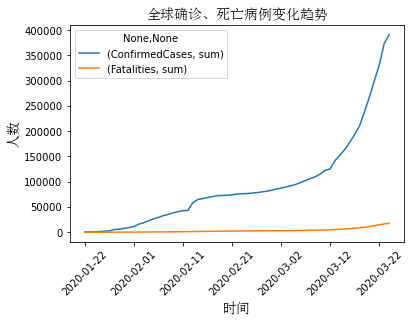

In [4]:
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
confirmed_case=train_df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_case=train_df.groupby(['Date']).agg({'Fatalities':['sum']})
total_case=confirmed_case.join(fatalities_case)
plt.figure(dpi=600)
total_case.plot()
plt.title('全球确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

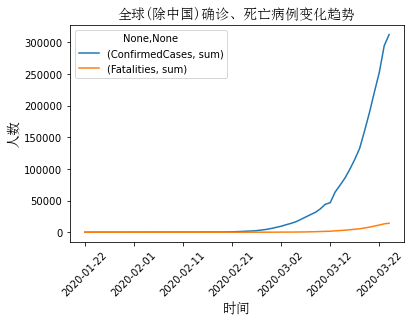

In [5]:
#对中国单独分析，最初的爆发对于研究结果影响比较大
confirmed_no_china=train_df[train_df['Country/Region']!='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_no_china=train_df[train_df['Country/Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_no_china=confirmed_no_china.join(fatalities_no_china)
plt.figure(dpi=600)
total_no_china.plot()
plt.title('全球(除中国)确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

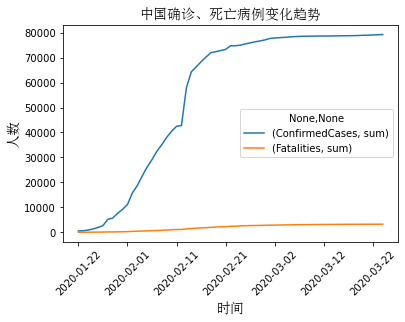

In [6]:
confirmed_china=train_df[train_df['Country/Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_china=train_df[train_df['Country/Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_china=confirmed_china.join(fatalities_china)
plt.figure(dpi=600)
total_china.plot()
plt.title('中国确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

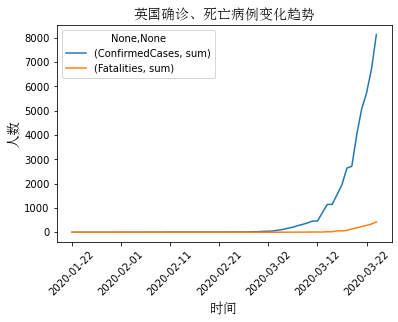

In [7]:
#关于Spain,Italy,UK,Singapore
confirmed_UK=train_df[train_df['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_UK=train_df[train_df['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_UK=confirmed_UK.join(fatalities_UK)
plt.figure(dpi=600)
total_UK.plot()
plt.title('英国确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

In [1]:
confirmed_Italy=train_df[train_df['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Italy=train_df[train_df['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_Italy=confirmed_Italy.join(fatalities_Italy)
plt.figure(dpi=600)
total_Italy.plot()
plt.title('意大利确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

NameError: name 'train_df' is not defined

<Figure size 3600x2400 with 0 Axes>

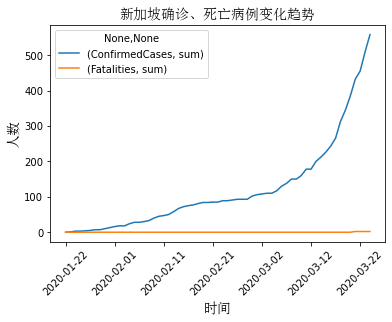

In [9]:
confirmed_S=train_df[train_df['Country/Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_S=train_df[train_df['Country/Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_S=confirmed_S.join(fatalities_S)
plt.figure(dpi=600)
total_S.plot()
plt.title('新加坡确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

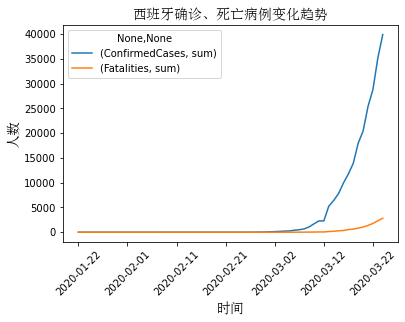

In [10]:
confirmed_Sp=train_df[train_df['Country/Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Sp=train_df[train_df['Country/Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_Sp=confirmed_Sp.join(fatalities_Sp)
plt.figure(dpi=600)
total_Sp.plot()
plt.title('西班牙确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

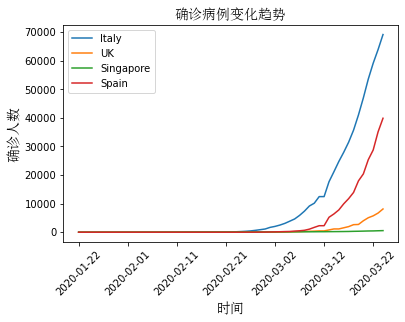

In [11]:
'''
分析图象：
意大利(0.67亿)：感染曲线十分陡峭，超过2%的人已经感染
西班牙（0.47亿）：情况同意大利相似
英国（0.6亿）：确诊病例相对较少，可能是.....
新加坡（0.057亿）：作为与大陆隔绝的岛国，相对来说比较孤立，人口流动少于上述几个国家
'''
confirmed_Italy.columns=['Italy']
confirmed_Sp.columns=['Spain']
confirmed_S.columns=['Singapore']
confirmed_UK.columns=['UK']
total_four=df = pd.concat([confirmed_Italy, confirmed_UK,confirmed_S,confirmed_Sp], axis=1 )
plt.figure(dpi=600)
total_four.plot()
plt.title('确诊病例变化趋势',fontproperties=font)
plt.ylabel('确诊人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

In [12]:
# 未得病易感染人群
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa
# 染上传染病
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb
# 康复人群
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [13]:
#龙格-库塔公式
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [14]:
def SIR(N, b0, beta, gamma, hs):

    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """

    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

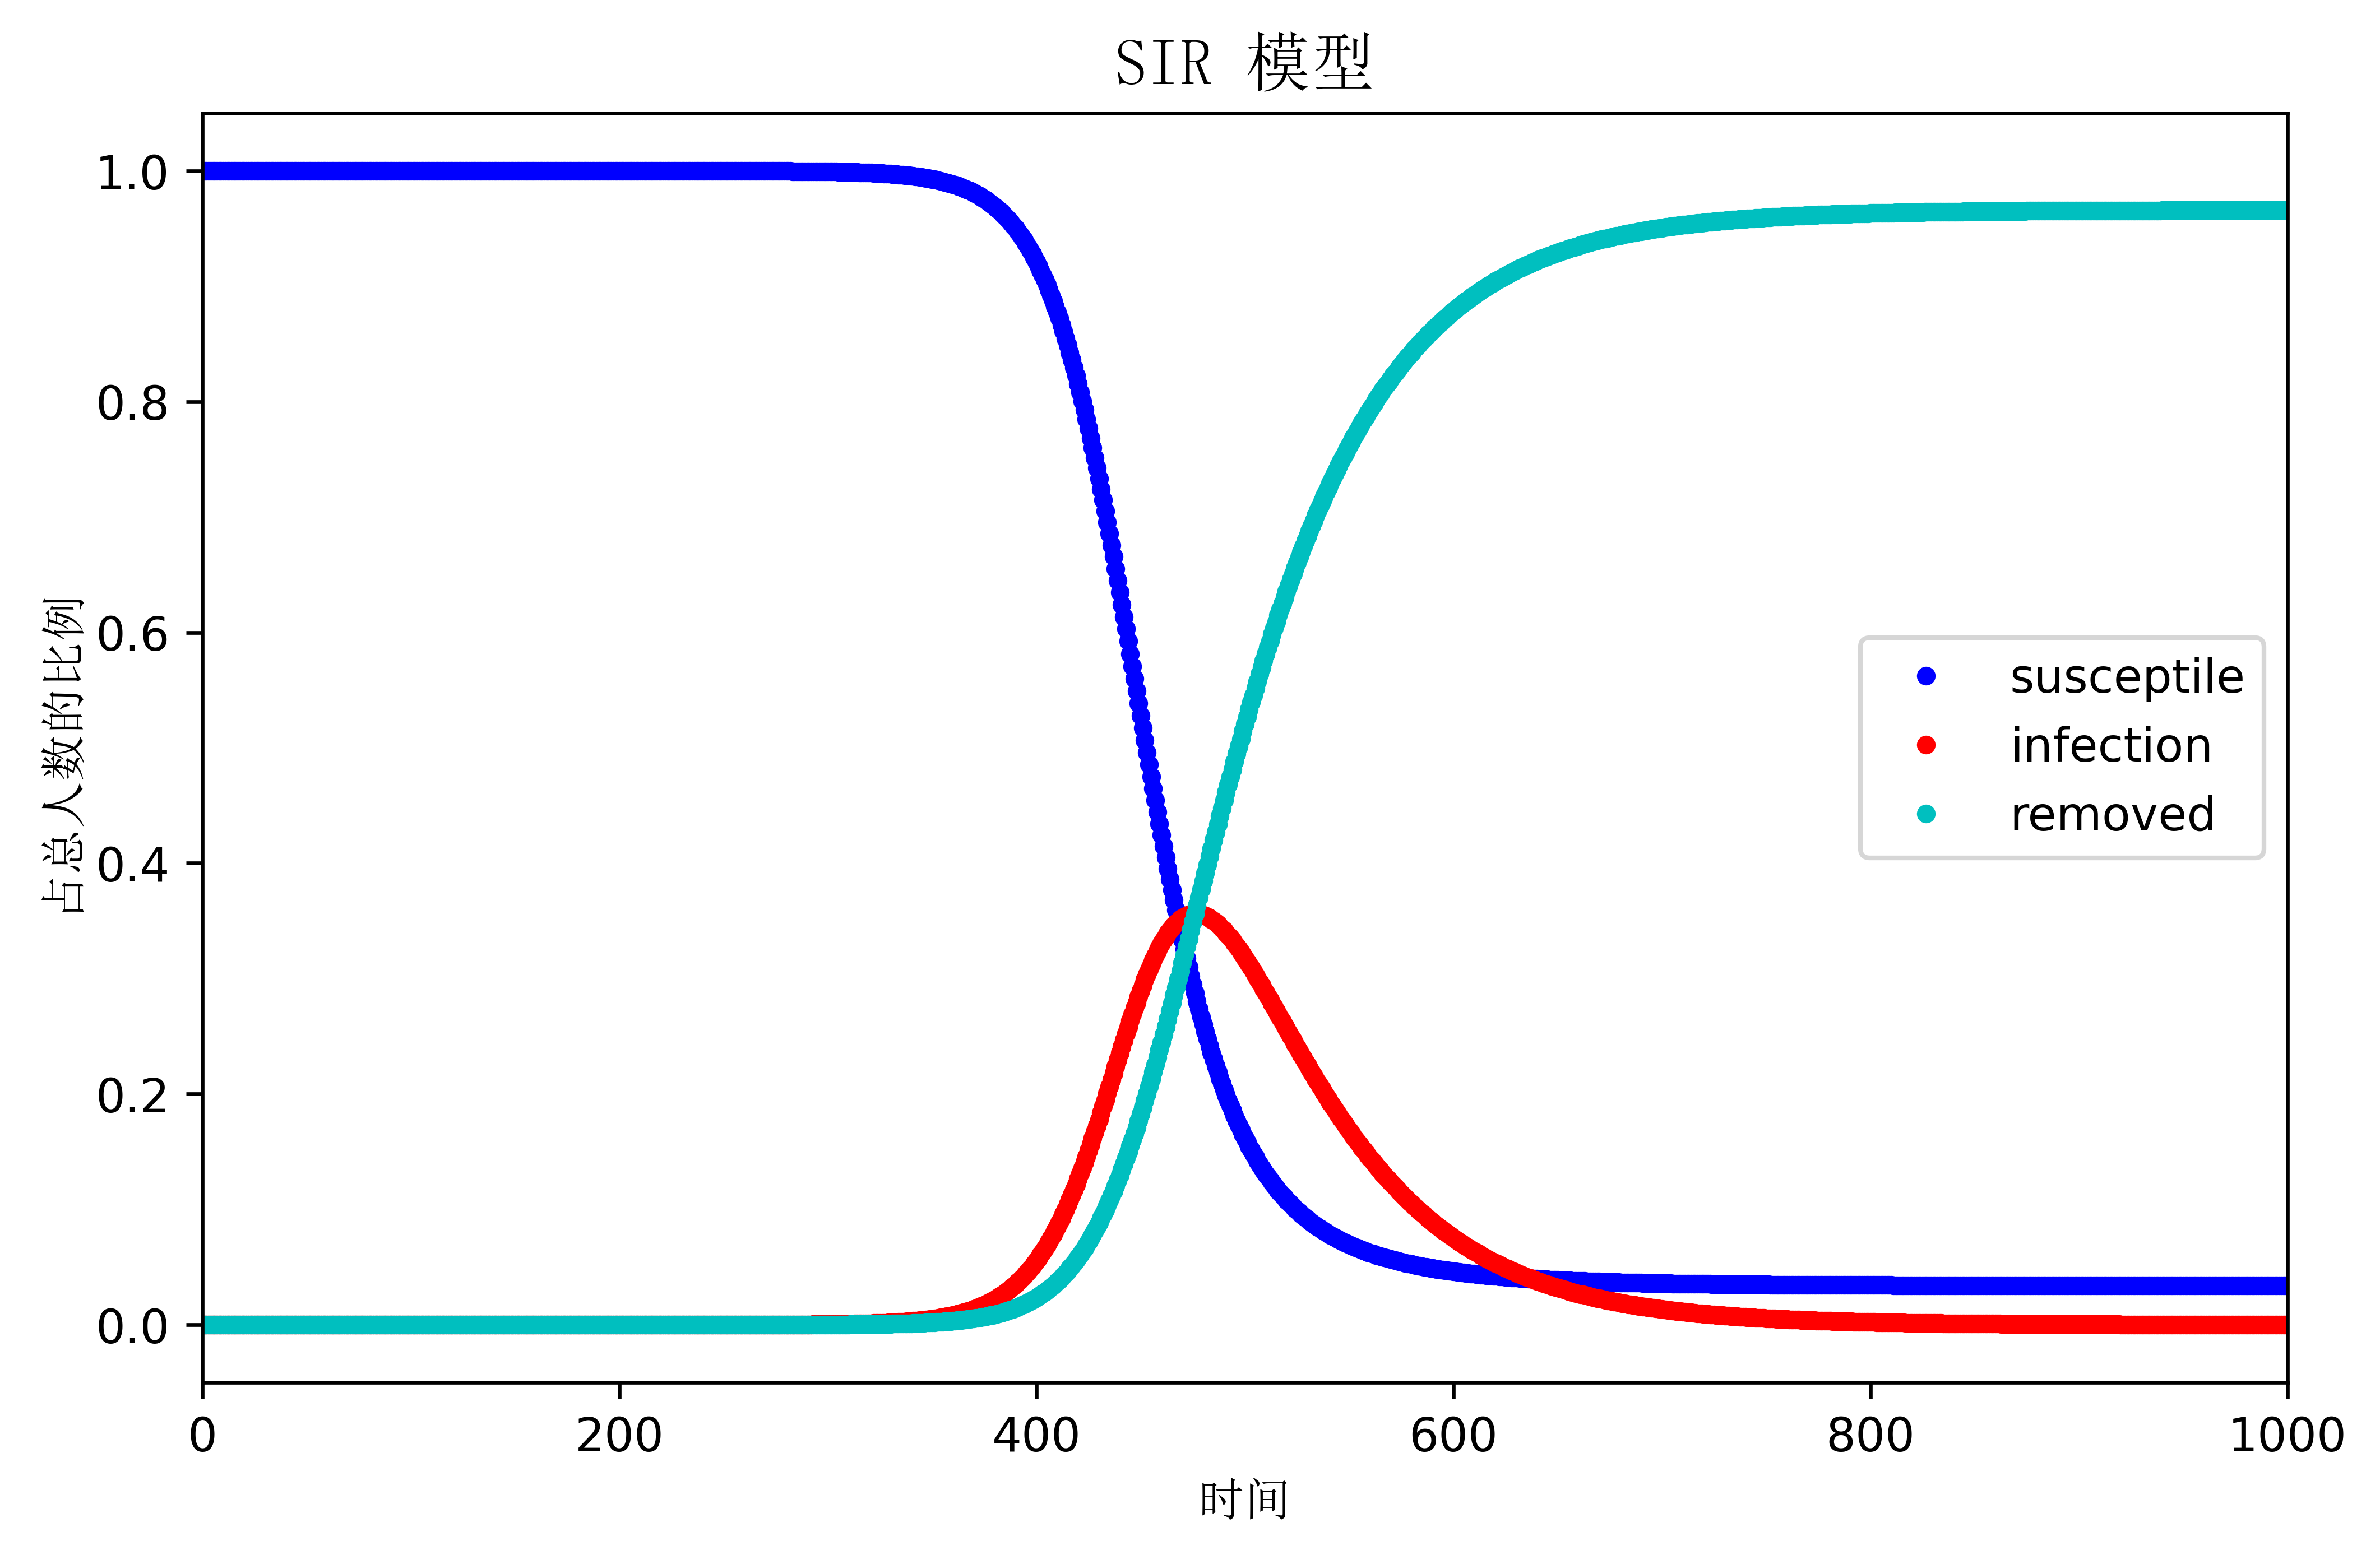

In [15]:
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5),dpi=600)
plt.plot(sus, 'b.', label='susceptile')
plt.plot(inf, 'r.', label='infection')
plt.plot(rec, 'c.', label='removed')
plt.title("SIR 模型",fontproperties=font)
plt.xlabel("时间", fontsize=10,fontproperties=font)
plt.ylabel("占总人数的比例", fontsize=10,fontproperties=font)
plt.legend(loc='best')
plt.xlim(0,1000)
plt.show()

In [16]:
#解出beta,gamma的值使模型的协方差最小
population=float(46750238)
country_df=pd.DataFrame()
country_df['ConfirmedCases']=train_df[train_df['Country/Region']=='Spain'].ConfirmedCases.diff().fillna(0)
country_df=country_df[10:]
country_df['Day']=list(range(1,len(country_df)+1))
ydata=[i for i in country_df.ConfirmedCases]
xdata=country_df.Day
ydata=np.array(ydata,dtype=float)
xdata=np.array(xdata,dtype=float)

N=population
sus0=N-ydata[0]
inf0=ydata[0]
rec0=0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

#使用优化器找出最佳参数
popt,pcov=optimize.curve_fit(fit_odeint,xdata,ydata)
predict=fit_odeint(xdata,*popt)
print("beta,gamma 的最佳参数：",popt[0],popt[1])

beta,gamma 的最佳参数： 9.157205517172468 8.98267751294316


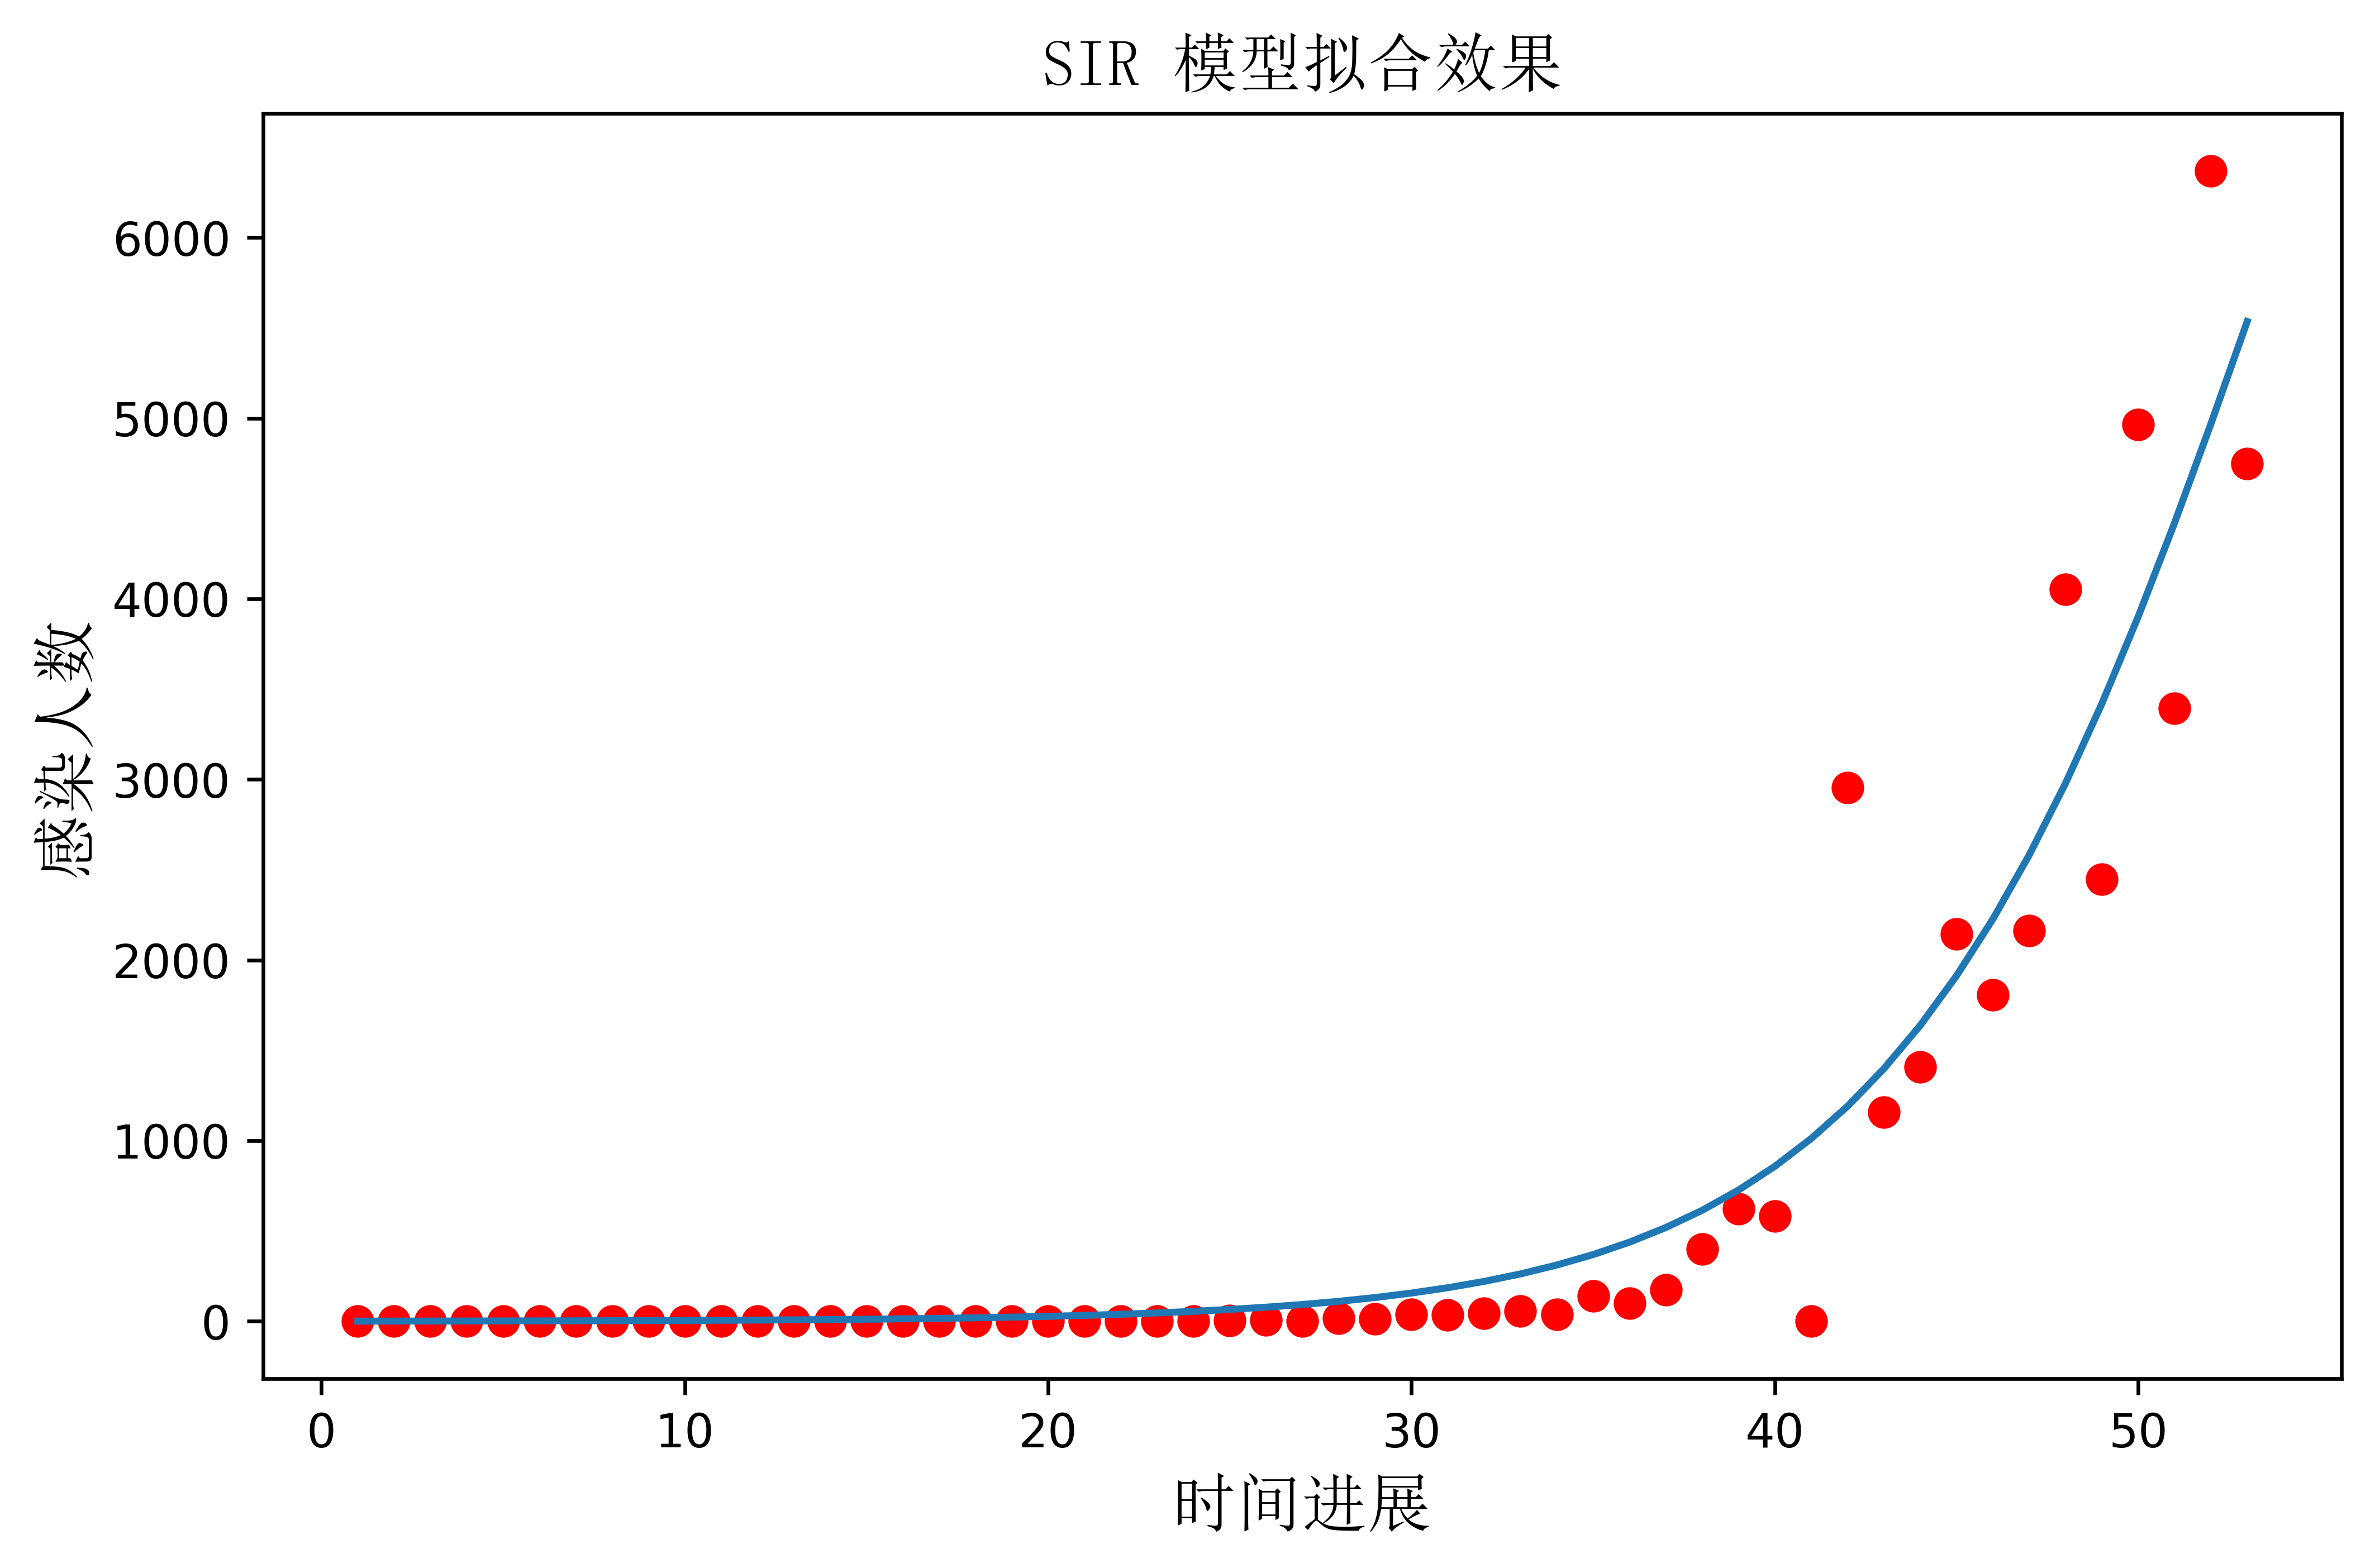

In [17]:
plt.figure(dpi=600,figsize=(8,5))
plt.scatter(xdata,ydata,marker='o',c='r')
plt.plot(xdata,predict)
plt.title('SIR 模型拟合效果',fontproperties=font)
plt.ylabel('感染人数',fontproperties=font)
plt.xlabel('时间进展',fontproperties=font)
plt.show()

In [18]:
print("该模型的标准差是",np.sqrt(np.diag(pcov)))

该模型的标准差是 [1.65438817 1.6516928 ]


In [19]:
#使用 时间序列ARIMA模型的预测
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
display(confirmed_no_china)

,ConfirmedCases
,sum
Date,
2020-01-22,6.0
2020-01-23,9.0
2020-01-24,19.0
2020-01-25,26.0
2020-01-26,38.0
...,...
2020-03-20,189164.0
2020-03-21,221263.0


In [20]:
#使用adf检验的方法确定疫情确诊人数走势是否平稳
adf_China=adfuller(confirmed_no_china)
print("数据未差分之前的p-value（小于0.05即可认为是平稳序列）：",adf_China[1])

数据未差分之前的p-value（小于0.05即可认为是平稳序列）： 0.995940705376092


<Figure size 3600x2400 with 0 Axes>

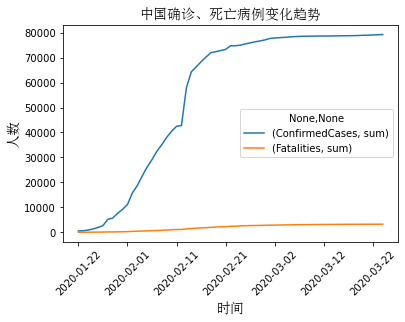

In [21]:
plt.figure(dpi=600)
total_china.plot()
plt.title('中国确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

一阶数据差分之后的p-value: 6.068371678780006e-05


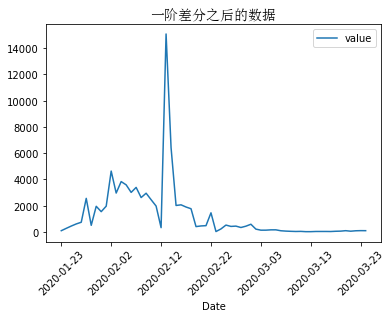

In [22]:
#确定模型参数d
confirmed_china_2=confirmed_china.diff(1)
confirmed_china_2=confirmed_china_2.dropna()
adf_China=adfuller(confirmed_china_2)
print("一阶数据差分之后的p-value:",adf_China[1])
#绘制差分化的图形
confirmed_china_2.plot()
plt.title('一阶差分之后的数据',fontproperties=font)
plt.xticks(rotation=45)
plt.legend(['value'])

<Figure size 3600x2400 with 0 Axes>

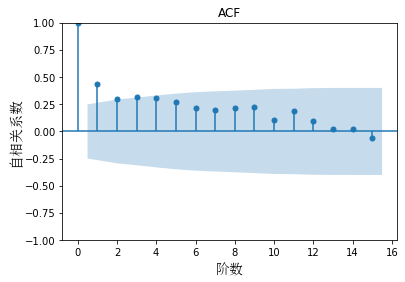

In [23]:
#绘制自相关系数的图形 找出模型参数中的p值
plt.figure(dpi=600)
acf = plot_acf(confirmed_china_2, lags=15)
plt.title("ACF")
plt.xlabel("阶数",fontproperties=font)
plt.ylabel("自相关系数",fontproperties=font)
plt.show()

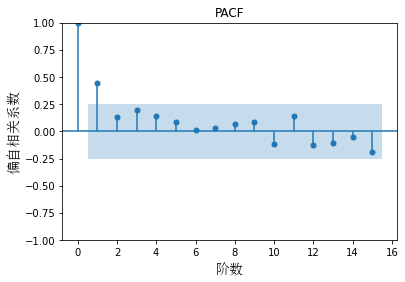

In [24]:
#绘制偏自相关系数的图形 找出模型参数里的q值
pacf = plot_pacf(confirmed_china_2, lags=15)
plt.title("PACF")
plt.xlabel("阶数",fontproperties=font)
plt.ylabel("偏自相关系数",fontproperties=font)
plt.show()

In [25]:
#使用AIC 定阶法确定 p,q的值
res=sm.tsa.arma_order_select_ic(confirmed_china_2,max_ar=5,max_ma=5,ic=['aic'])
print(res.aic_min_order)

(1, 1)


In [26]:
#根据aic定阶法和自相关系数、偏自相关系数的示意图 基本确定p=1 d=1 q=1
model=ARIMA(confirmed_china_2,order=(3,1,2))
result_china=model.fit()
print(result_china.summary())

                               SARIMAX Results                                
Dep. Variable:     ConfirmedCases_sum   No. Observations:                   62
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -549.797
Date:                Thu, 25 Nov 2021   AIC                           1111.594
Time:                        19:37:01   BIC                           1124.259
Sample:                    01-23-2020   HQIC                          1116.558
                         - 03-24-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7931      1.581     -0.502      0.616      -3.892       2.306
ar.L2         -0.0239      0.363     -0.066      0.948      -0.735       0.687
ar.L3         -0.0734      0.364     -0.201      0.8

In [27]:
print(confirmed_china.loc['2020-03-11'])
pre_1=result_china.predict('20200312','20200322',dynamic=True,type='levels')
#去差分化
pre_real=pre_1
pre_real=pd.DataFrame(pre_real)
display(pre_real)

ConfirmedCases  sum    78648.0
Name: 2020-03-11, dtype: float64


,predicted_mean
2020-03-12,71.274790
2020-03-13,88.258002
2020-03-14,73.337030
2020-03-15,81.881028
2020-03-16,74.213937
2020-03-17,81.186373
2020-03-18,75.212224
2020-03-19,80.346830
2020-03-20,75.905235
2020-03-21,79.743945


In [28]:
pre_real.columns=['predict_value']
pre_real.predict_value['2020-03-12']=78648+71
for i in range(len(pre_1)-1):
    pre_real.iloc[i+1][0]=pre_real.iloc[i][0]+pre_1.iloc[i]
display(pre_real)

,predict_value
2020-03-12,78719.000000
2020-03-13,78790.274790
2020-03-14,78878.532792
2020-03-15,78951.869822
2020-03-16,79033.750850
2020-03-17,79107.964787
2020-03-18,79189.151160
2020-03-19,79264.363385
2020-03-20,79344.710215
2020-03-21,79420.615450


(array([18283, 18293, 18322, 18345], dtype=int64),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

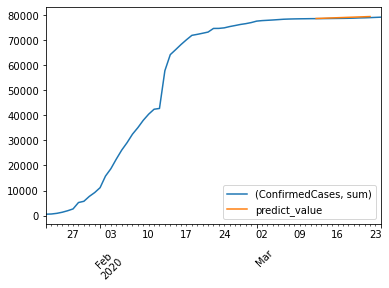

In [29]:
pre_real.index=pd.date_range('2020-03-12',periods=11)
confirmed_china.index=pd.date_range('2020-01-22',periods=63)
both_p_r=confirmed_china.join(pre_real)
both_p_r.plot()
plt.xticks(rotation=45)

In [30]:
#使用AIC BIC 定阶结果
#根据aic定阶法和自相关系数、偏自相关系数的示意图 基本确定p=1 d=1 q=1
model=ARIMA(confirmed_china_2,order=(1,1,1))
result_china=model.fit()
print(result_china.summary())

                               SARIMAX Results                                
Dep. Variable:     ConfirmedCases_sum   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -550.057
Date:                Thu, 25 Nov 2021   AIC                           1106.113
Time:                        19:37:01   BIC                           1112.446
Sample:                    01-23-2020   HQIC                          1108.595
                         - 03-24-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1395      0.349      0.400      0.689      -0.544       0.823
ma.L1         -0.7850      0.140     -5.614      0.000      -1.059      -0.511
sigma2      4.391e+06   5.27e+05      8.332      0.0

In [31]:
print(confirmed_china.loc['2020-03-11'])
pre_1=result_china.predict('20200312','20200322',dynamic=True,type='levels')
#去差分化
pre_real=pre_1
pre_real=pd.DataFrame(pre_real)
display(pre_real)

ConfirmedCases  sum    78648.0
Name: 2020-03-11 00:00:00, dtype: float64


,predicted_mean
2020-03-12,98.487961
2020-03-13,107.763994
2020-03-14,109.058134
2020-03-15,109.238686
2020-03-16,109.263875
2020-03-17,109.267389
2020-03-18,109.267880
2020-03-19,109.267948
2020-03-20,109.267958
2020-03-21,109.267959


In [32]:
print(pre_1.iloc[0])
pre_real.columns=['predict_value']
pre_real.predict_value['2020-03-12']=78648+71
for i in range(len(pre_1)-1):
    pre_real.iloc[i+1][0]=pre_real.iloc[i][0]+pre_1.iloc[i]
display(pre_real)

98.48796141588139


,predict_value
2020-03-12,78719.000000
2020-03-13,78817.487961
2020-03-14,78925.251955
2020-03-15,79034.310089
2020-03-16,79143.548775
2020-03-17,79252.812650
2020-03-18,79362.080039
2020-03-19,79471.347919
2020-03-20,79580.615867
2020-03-21,79689.883825


(array([18283, 18293, 18322, 18345], dtype=int64),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

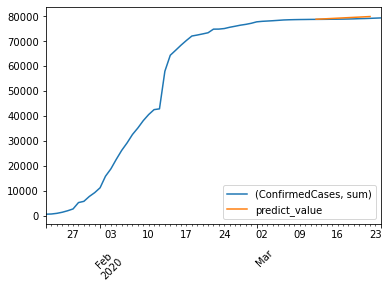

In [33]:
pre_real.index=pd.date_range('2020-03-12',periods=11)
confirmed_china.index=pd.date_range('2020-01-22',periods=63)
both_p_r=confirmed_china.join(pre_real)
both_p_r.plot()
plt.xticks(rotation=45)

<Figure size 3600x2400 with 0 Axes>

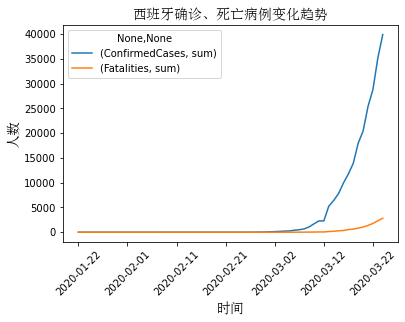

In [34]:
#使用Prophet时间序列算法的新冠疫情的预测
#导入数据 西班牙数据
confirmed_Sp=train_df[train_df['Country/Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Sp=train_df[train_df['Country/Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_Sp=confirmed_Sp.join(fatalities_Sp)
plt.figure(dpi=600)
total_Sp.plot()
plt.title('西班牙确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

In [35]:
display(confirmed_Sp)

,ConfirmedCases
,sum
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-03-20,20410.0
2020-03-21,25374.0


In [36]:
confirmed_Sp['ds']=pd.date_range('2020-01-22',periods=63)
confirmed_Sp.columns=['y','ds']
display(confirmed_Sp)

,y,ds
Date,,
2020-01-22,0.0,2020-01-22
2020-01-23,0.0,2020-01-23
2020-01-24,0.0,2020-01-24
2020-01-25,0.0,2020-01-25
2020-01-26,0.0,2020-01-26
...,...,...
2020-03-20,20410.0,2020-03-20
2020-03-21,25374.0,2020-03-21
2020-03-22,28768.0,2020-03-22


In [37]:
from fbprophet import Prophet
#初始化模型
m=Prophet()
#拟合模型
m.fit(confirmed_Sp)
#计算预测值 periods表示需要预测的点数 freq 表示预测的频率
future=m.make_future_dataframe(periods=20,freq='D')
future.tail()
forecast=m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


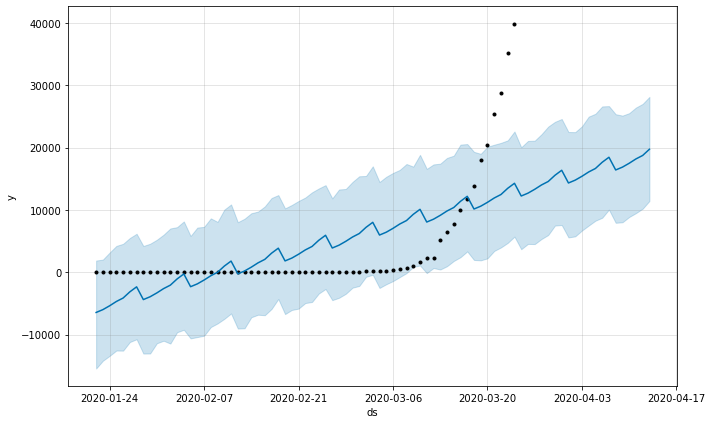

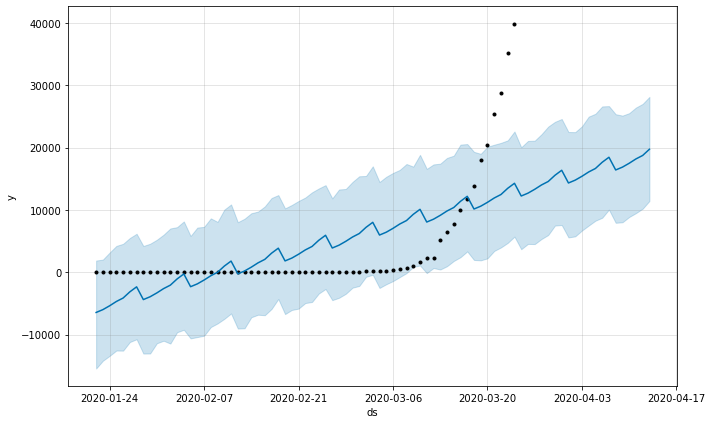

In [38]:
m.plot(forecast)

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


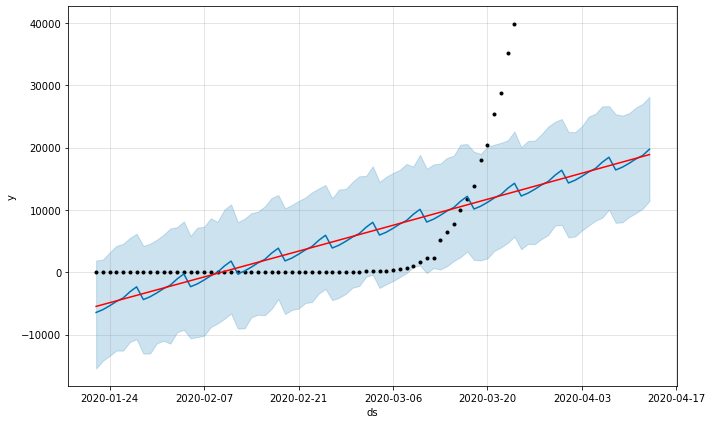

In [39]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [40]:
'''
调整参数：趋势灵活性 changepoint_prior_scale - 0.9
        不确定区间 interval_width - 0.9
交叉验证找出最佳参数
'''
m=Prophet(changepoint_prior_scale=0.9,interval_width=0.9)
#拟合模型
m.fit(confirmed_Sp)
#计算预测值 periods表示需要预测的点数 freq 表示预测的频率
future=m.make_future_dataframe(periods=20,freq='D')
future.tail()
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


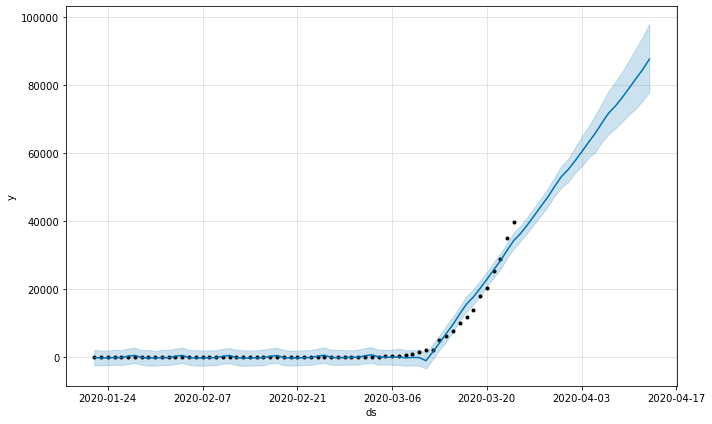

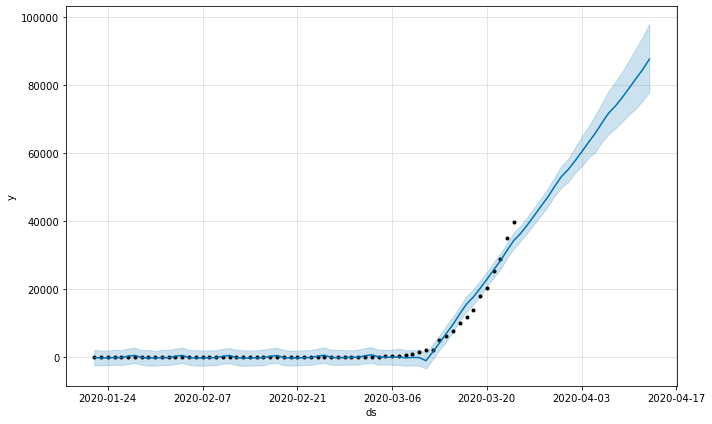

In [41]:
m.plot(forecast)

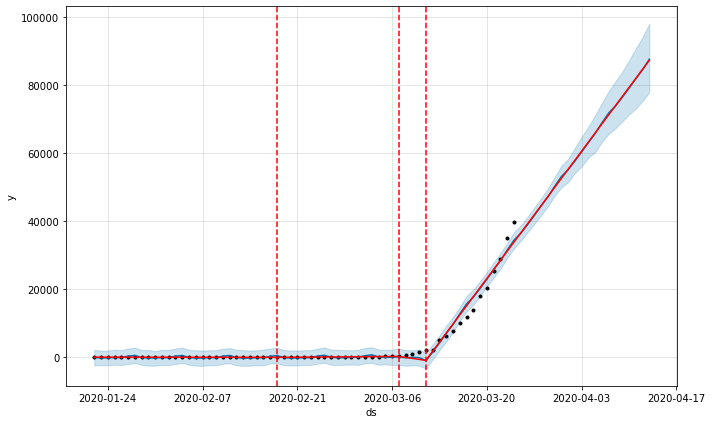

In [42]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [43]:
#使用逻辑回归的方法 需要设置capcity的值 5080663
m=Prophet(changepoint_prior_scale=0.9,interval_width=0.9,growth='logistic')
#拟合模型
confirmed_Sp['cap']=80663
confirmed_Sp['floor']=0
m.fit(confirmed_Sp)
#计算预测值 periods表示需要预测的点数 freq 表示预测的频率
future=m.make_future_dataframe(periods=20,freq='D')
future.tail()
future['cap']=80663
future['floor']=0
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


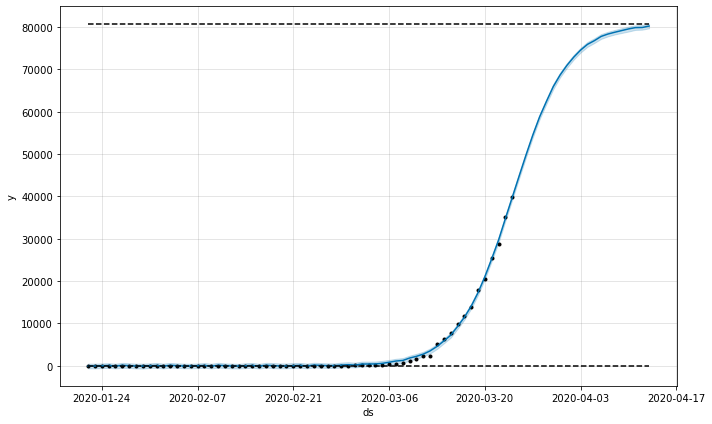

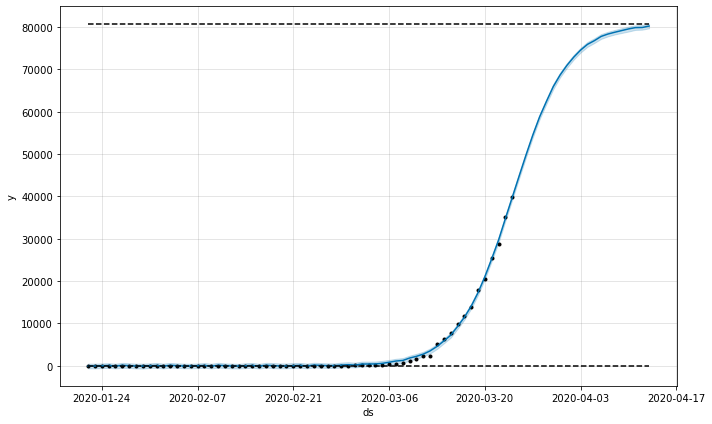

In [44]:
m.plot(forecast)

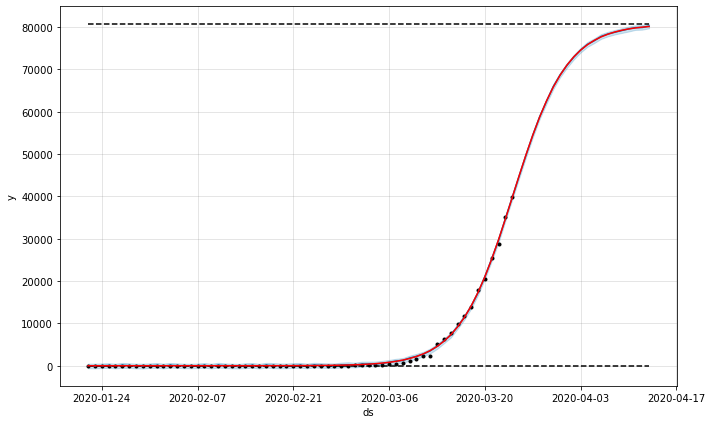

In [45]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [46]:
#交叉验证找出最佳参数
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {
    'changepoint_prior_scale': [0.6, 0.7, 0.8 , 0.9,1.0],
    'interval_width': [0.6, 0.7, 0.8 , 0.9,1.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(confirmed_Sp)  # Fit model with given params
    df_cv = cross_validation(m,horizon='15 days',parallel='processes')
    #该参数rolling_window指定在每个滚动窗口中使用的预测比例。默认为 0.1，对应df_cv每个窗口包含的行数的 10%
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2020-03-09 00:00:00 and 2020-03-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001C826FD2A60>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2020-03-09 00:00:00 and 2020-03-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001C828A83580>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

    changepoint_prior_scale  interval_width          rmse
0                       0.6             0.6  18117.789042
1                       0.6             0.7  18117.789042
2                       0.6             0.8  18117.789042
3                       0.6             0.9  18117.789042
4                       0.6             1.0  18117.789042
5                       0.7             0.6  18110.815360
6                       0.7             0.7  18110.815360
7                       0.7             0.8  18110.815360
8                       0.7             0.9  18110.815360
9                       0.7             1.0  18110.815360
10                      0.8             0.6  18100.615841
11                      0.8             0.7  18100.615841
12                      0.8             0.8  18100.615841
13                      0.8             0.9  18100.615841
14                      0.8             1.0  18100.615841
15                      0.9             0.6  18095.433742
16            

In [47]:
#找出最佳参数
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 1.0, 'interval_width': 0.6}


In [48]:
#使用逻辑回归的方法 需要设置capcity的值 5080663
m=Prophet(changepoint_prior_scale=1.0,interval_width=0.6,growth='logistic')
#拟合模型
confirmed_Sp['cap']=80663
confirmed_Sp['floor']=0
m.fit(confirmed_Sp)
#计算预测值 periods表示需要预测的点数 freq 表示预测的频率
future=m.make_future_dataframe(periods=20,freq='D')
future.tail()
future['cap']=80663
future['floor']=0
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, '西班牙确诊人数预测数据')

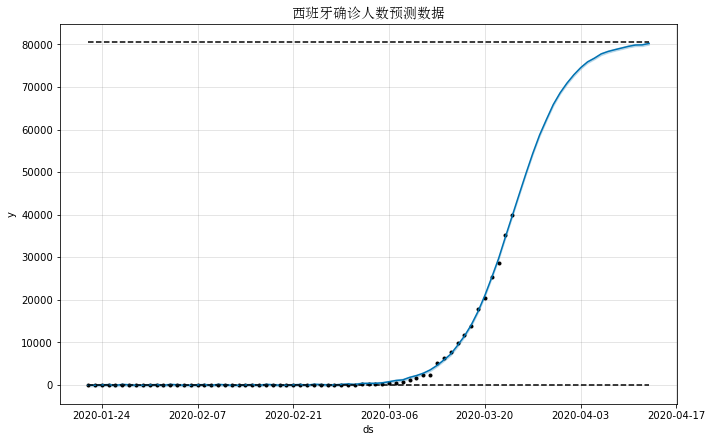

In [49]:
m.plot(forecast)
plt.title('西班牙确诊人数预测数据',fontproperties=font)

Text(0.5, 1.0, '西班牙确诊人数预测数据')

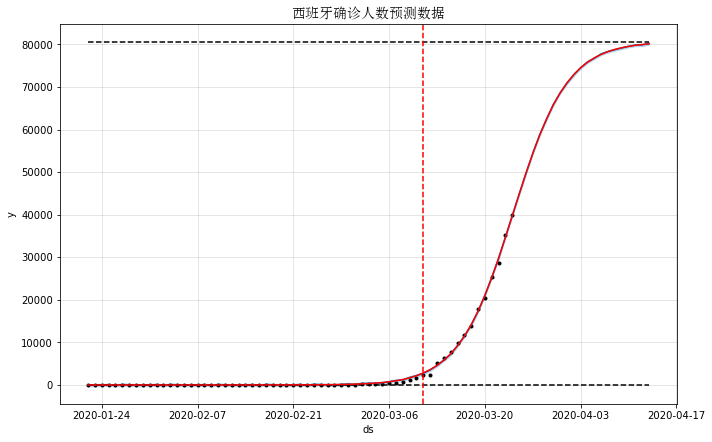

In [50]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('西班牙确诊人数预测数据',fontproperties=font)

In [51]:
df=pd.read_csv(r'D:\Python\Python_Project\Python Covid 19\data3_India\covid_19_india.csv')
display(df)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [61]:
values=df['State/UnionTerritory'].value_counts()[:29]
values=values.to_frame()
display(values)

,State/UnionTerritory
Kerala,560
Delhi,528
Rajasthan,527
Uttar Pradesh,526
Haryana,526
Ladakh,523
Tamil Nadu,523
Punjab,521
Jammu and Kashmir,521
Maharashtra,520


In [60]:
names=values.index.tolist()
number=values.values.tolist()

array([560, 528, 527, 526, 526, 523, 523, 521, 521, 520, 520, 518, 515,
       514, 512, 512, 511, 511, 510, 508, 508, 506, 506, 505, 504, 504,
       498, 498, 496], dtype=int64)